# Final Project for Cogs 118B
Group Members:
- Samruddhi Hande ([email](shande@ucsd.edu))
- Ron Hasson ([email](rhasson@ucsd.edu))
- Andrew Hernandez ([email](ash053@ucsd.edu))
- Mehail Mathew Sunny ([email](msmathew@ucsd.edu))
- Justin Yang ([email](justin-yang@ucsd.edu))

## Agglomerative clustering algorithm
### Import packages and set up paths

In [3]:
import os, re
import pandas as pd
import numpy as np
import time
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics.cluster import fowlkes_mallows_score
from sklearn.preprocessing import LabelEncoder

In [2]:
raw_npca = np.load('data/sketches_raw_nopca.npy')
fc6_npca = np.load('data/sketches_fc6_nopca.npy')
raw_pca  = np.load('data/sketches_raw_pca.npy')
fc6_pca  = np.load('data/sketches_fc6_pca.npy')
metadata = pd.read_csv('data/sketches_metadata.csv')
metadata['category_factored'] = LabelEncoder().fit_transform(metadata.category)

feature_set = [raw_npca, fc6_npca, raw_pca, fc6_pca]
labels_set  = [metadata.sort_values(col).category_factored.values 
               for col in metadata.drop(columns=['category', 'category_factored']).columns]

In [3]:
model = AgglomerativeClustering(n_clusters = 32, affinity = 'euclidean', linkage = 'ward').fit(feature_set[3])
print(f'ward, euclidean: ', fowlkes_mallows_score(labels_set[3], model.labels_))

for i in ["euclidean", "manhattan", "cosine"]:
    for j in ['average', 'complete', 'single']:
        model = AgglomerativeClustering(n_clusters = 32, affinity = i, linkage = j).fit(feature_set[3])
        print(f'{j}, {i}: ', fowlkes_mallows_score(labels_set[3], model.labels_))

ward, euclidean:  0.03503550363755152
average, euclidean:  0.16489320276689445
complete, euclidean:  0.07227648862616926
single, euclidean:  0.17470919825995143
average, manhattan:  0.17208166982023657
complete, manhattan:  0.10216043856182717
single, manhattan:  0.17470942572199524
average, cosine:  0.0667571968023508
complete, cosine:  0.03676196649312498
single, cosine:  0.1747532463583583


#### We will go with agglomerative clustering using cosine linkage metric and 'single' linkage criterion.

In [4]:
cols = metadata.drop(columns=['category', 'category_factored']).columns.values
FMI = dict()

for i, feature in enumerate(cols):
    model = AgglomerativeClustering(n_clusters = 32, affinity = 'cosine', linkage = 'single').fit(feature_set[i])
    FMI[feature[:-4]] = fowlkes_mallows_score(labels_set[i], model.labels_)
    print(f'On feature {feature[:-4]}, score: {FMI[feature[:-4]]}')

On feature raw_sketch, score: 0.17470313260544948
On feature fc6_sketch, score: 0.17470904661858888
On feature raw_sketch_pca, score: 0.17470988046686492
On feature fc6_sketch_pca, score: 0.1747532463583583


### What is the baseline for our algorithms?

0.031252463463680116


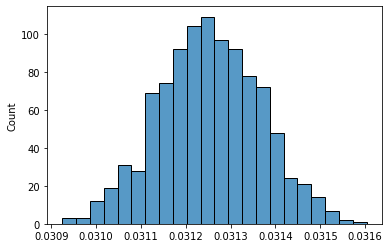

In [6]:
import random
import seaborn as sns
randscores = []
for i in range(1000):
    randa = [random.randint(1,32) for i in range(12288)]
    randb = [random.randint(1,32) for i in range(12288)]
    randscores.append(fowlkes_mallows_score(randa, randb))
print(np.mean(randscores))
sns.histplot(randscores);

0.24998991257492167


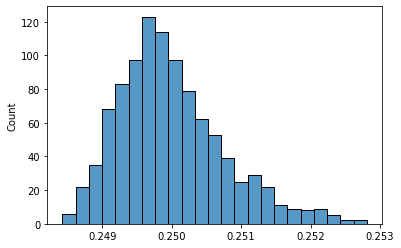

In [7]:
randscores = []
for i in range(1000):
    randa = [random.randint(1,4) for i in range(1536)]
    randb = [random.randint(1,4) for i in range(1536)]
    randscores.append(fowlkes_mallows_score(randa, randb))
print(np.mean(randscores))
sns.histplot(randscores);